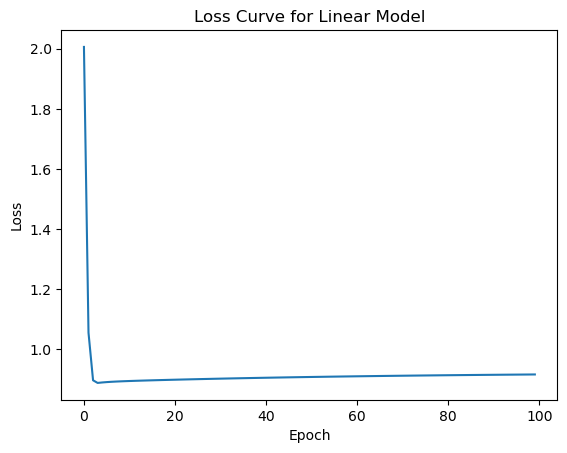

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class LinearNN:
    def __init__(self):
        self.w1 = np.random.randn()
        self.b1 = np.random.randn()
        self.w2 = np.random.randn()
        self.b2 = np.random.randn()
        self.learning_rate = 0.01
    
    def forward(self, x):
        self.z1 = self.w1 * x + self.b1  
        self.z2 = self.w2 * self.z1 + self.b2  
        return self.z2
    
    def compute_loss(self, y_pred, y_true):
        return 0.5 * (y_pred - y_true) ** 2  
    
    def backward(self, x, y_true):
        y_pred = self.forward(x)
        
        dL_dy = y_pred - y_true  
        dL_dw2 = dL_dy * self.z1  
        dL_db2 = dL_dy  
        
        dL_dz1 = dL_dy * self.w2  
        dL_dw1 = dL_dz1 * x  
        dL_db1 = dL_dz1  
        
        self.w1 -= self.learning_rate * dL_dw1
        self.b1 -= self.learning_rate * dL_db1
        self.w2 -= self.learning_rate * dL_dw2
        self.b2 -= self.learning_rate * dL_db2

np.random.seed(42)
x_train = np.linspace(-5, 5, 100)
y_train = 2 * x_train + 3 + np.random.randn(100) * 2  

nn = LinearNN()
losses = []
for epoch in range(100):
    total_loss = 0
    for i in range(len(x_train)):
        nn.backward(x_train[i], y_train[i])
        total_loss += nn.compute_loss(nn.forward(x_train[i]), y_train[i])
    losses.append(total_loss / len(x_train))

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve for Linear Model')
plt.show()